In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_training, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import keras
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True

In [4]:
evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)

2024-07-22 11:40:59.361541: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-22 11:40:59.361560: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-22 11:40:59.361566: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-22 11:40:59.361596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-22 11:40:59.361617: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 2
MTD:

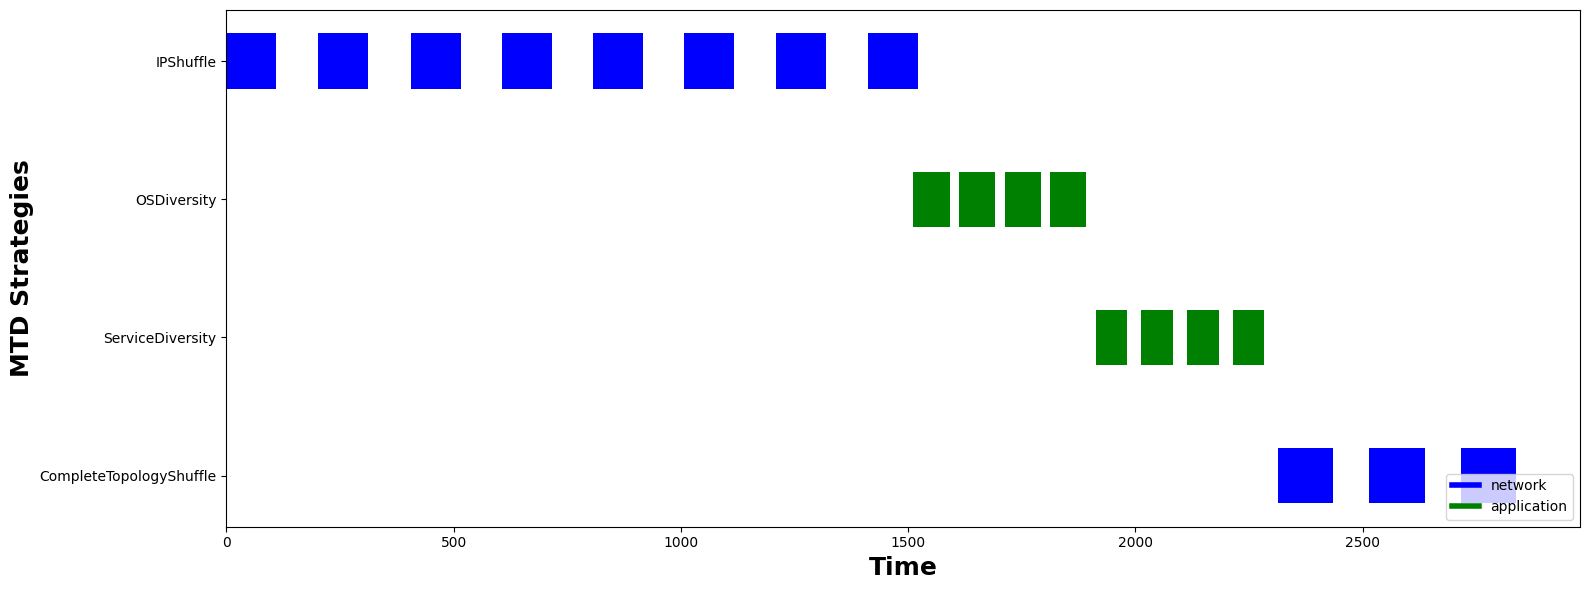

In [5]:
evaluation.visualise_mtd_operation()

In [6]:
evaluation._security_metric_record

,host_compromise_ratio,exposed_endpoints,attack_path_exposure_score,overall_asr_ratio,roa,shortest_path_vulnerability,risk,mtd_frequency,overall_mtcc_avg,time_since_last_mtd,times
0,0.000000,5.0,0.210852,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,5.0,0.211102,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.847951,100.847951
2,0.000000,5.0,0.212646,0.000000,0.000000,0.0,0.000000,0.009090,0.000000,91.408886,201.422609
3,0.000000,5.0,0.212646,0.000000,0.000000,0.0,0.000000,0.009090,0.000000,91.408886,201.422609
4,0.000000,5.0,0.212698,0.000000,0.000000,0.0,0.000000,0.009090,0.000000,101.439368,302.861977
5,0.000000,5.0,0.212698,0.000000,0.000000,0.0,0.000000,0.006415,0.000000,93.377536,405.128595
6,0.000000,5.0,0.212815,0.000000,0.000000,0.0,0.000000,0.006415,0.000000,100.682711,505.811306
7,0.000000,5.0,0.212815,0.000000,0.000000,0.0,0.000000,0.006415,0.000000,100.682711,505.811306
8,0.000000,5.0,0.214097,0.000000,0.000000,0.0,0.000000,0.005819,0.000000,90.521045,606.091352
9,0.000000,5.0,0.214097,0.000000,0.000000,0.0,0.000000,0.005819,0.000000,90.521045,606.091352


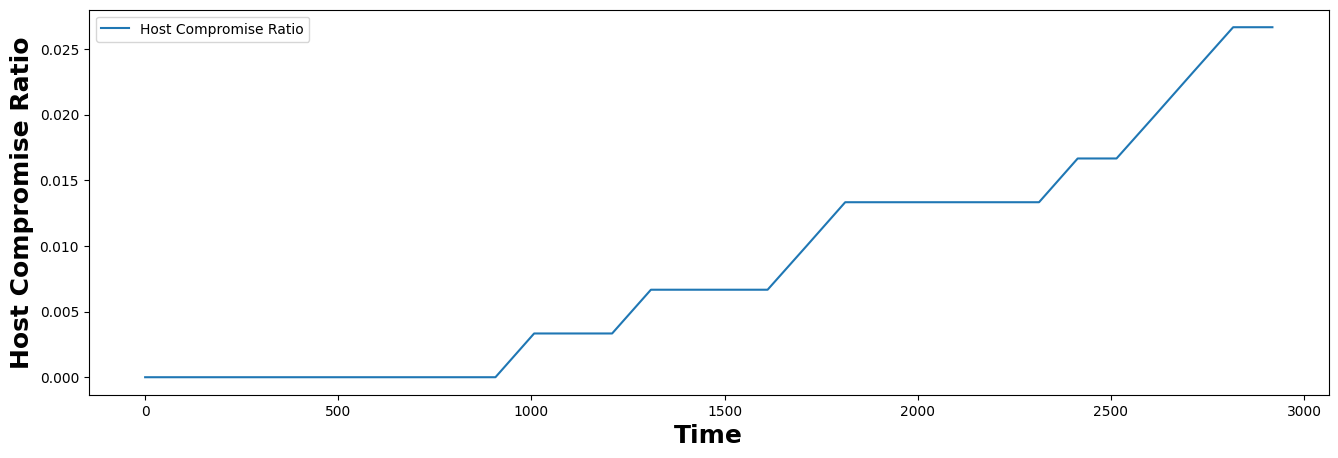

In [7]:
evaluation.visualize_host_compromise_ratio()

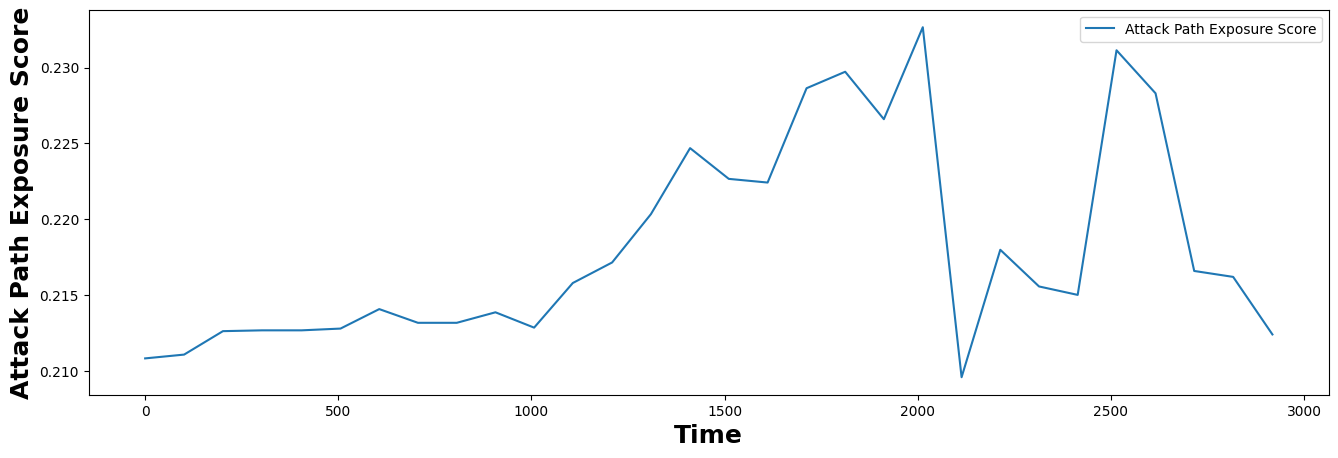

In [8]:
evaluation.visualize_attack_path_exposure_score()

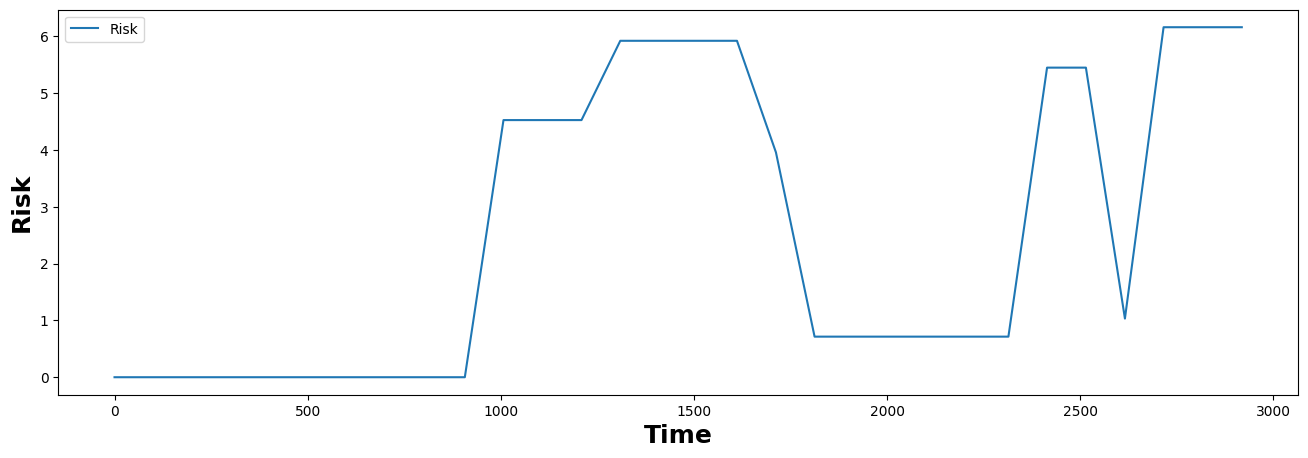

In [9]:
evaluation.visualize_risk()

In [10]:
# evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100, new_network=True)